In [1]:
#importing libraries
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Importing the dataset
df = pd.read_csv('Mall_Customers.csv')
df.head()
# Extracting Variables
x = df.iloc[:, [3, 4]].values
#finding optimal number of clusters using the elbow method
from sklearn.cluster import KMeans
wcss_list= [] #Initializing the list for the values of WCSS
#Using for loop for iterations from 1 to 10.
for i in range(1, 11):
 kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
 kmeans.fit(x)
 wcss_list.append(kmeans.inertia_)

 mtp.plot(range(1, 11), wcss_list)
mtp.title('The Elobw Method Graph')
mtp.xlabel('Number of clusters(k)')
mtp.ylabel('wcss_list')
mtp.show()
# Normalize features for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
#training the K-means model on a dataset
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)
y_predict= kmeans.fit_predict(X_scaled)
#visulaizing the clusters
mtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c =
'blue', label = 'Cluster 1') #for first cluster
mtp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c =
'green', label = 'Cluster 2') #for second cluster
mtp.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c =
'red', label = 'Cluster 3') #for third cluster
mtp.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c =
'black', label = 'Cluster 4') #for fourth cluster
mtp.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c =
'purple', label = 'Cluster 5') #for fifth cluster
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,
1], s = 300, c = 'yellow', label = 'Centroid')
mtp.title('Clusters of customers')
mtp.xlabel('Annual Income (k$)')
mtp.ylabel('Spending Score (1-100)')
mtp.legend()
mtp.show()

FileNotFoundError: [Errno 2] No such file or directory: 'Mall_Customers.csv'

   vehicle_serial_no vehicle_type  cluster_no_scaling  cluster_scaled
0                  5          SUV                   2               2
1                  3        Sedan                   2               2
2                  8        Truck                   1               1
3                  2    Hatchback                   0               0
4                  4        Sedan                   0               2
5                  7        Truck                   1               1
6                  6          SUV                   2               2
7                 10        Truck                   1               1
8                  1    Hatchback                   0               0
9                  9          SUV                   1               1


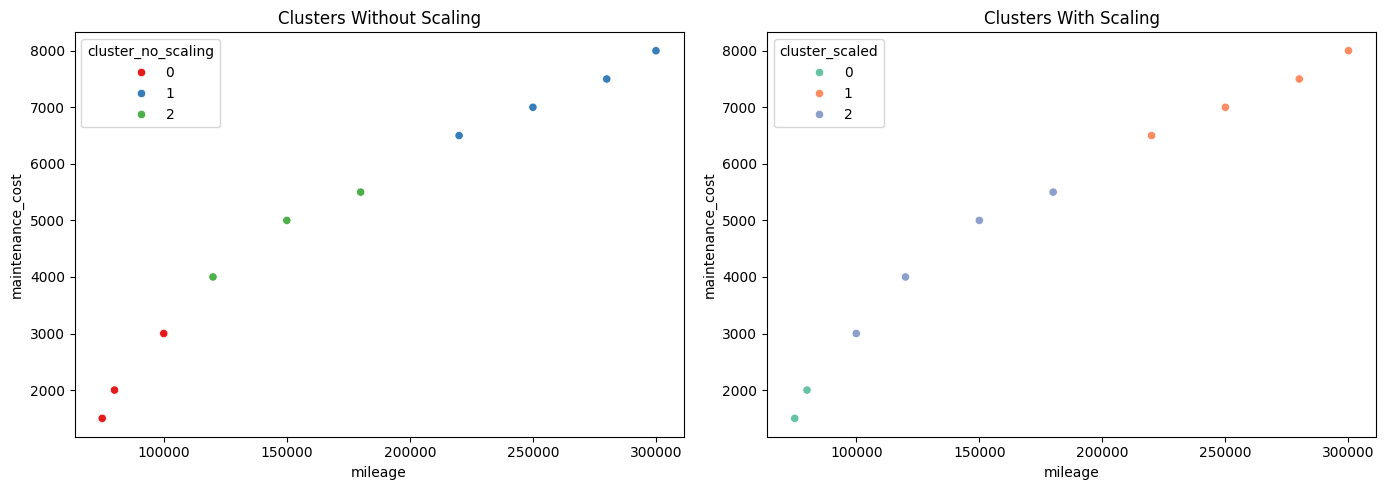

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Sample vehicle data
data = {
    'vehicle_serial_no': [5, 3, 8, 2, 4, 7, 6, 10, 1, 9],
    'mileage': [150000, 120000, 250000, 80000, 100000, 220000, 180000, 300000, 75000, 280000],
    'fuel_efficiency': [15, 18, 10, 22, 20, 12, 16, 8, 24, 9],
    'maintenance_cost': [5000, 4000, 7000, 2000, 3000, 6500, 5500, 8000, 1500, 7500],
    'vehicle_type': ['SUV', 'Sedan', 'Truck', 'Hatchback', 'Sedan', 'Truck', 'SUV', 'Truck', 'Hatchback', 'SUV']
}

df = pd.DataFrame(data)

# Encode categorical variable
le = LabelEncoder()
df['vehicle_type_encoded'] = le.fit_transform(df['vehicle_type'])

# Prepare input features (include encoded type, exclude serial number)
features = df[['mileage', 'fuel_efficiency', 'maintenance_cost', 'vehicle_type_encoded']]

kmeans_no_scaling = KMeans(n_clusters=3, random_state=42)
df['cluster_no_scaling'] = kmeans_no_scaling.fit_predict(features)

features_scaled = features.copy()
scaler = StandardScaler()
features_scaled[['mileage', 'fuel_efficiency', 'maintenance_cost']] = scaler.fit_transform(
    features_scaled[['mileage', 'fuel_efficiency', 'maintenance_cost']]
)

kmeans_scaled = KMeans(n_clusters=3, random_state=42)
df['cluster_scaled'] = kmeans_scaled.fit_predict(features_scaled)

# View the clustering results
print(df[['vehicle_serial_no', 'vehicle_type', 'cluster_no_scaling', 'cluster_scaled']])

# Plot clusters
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

sns.scatterplot(data=df, x='mileage', y='maintenance_cost', hue='cluster_no_scaling', palette='Set1', ax=axs[0])
axs[0].set_title("Clusters Without Scaling")

sns.scatterplot(data=df, x='mileage', y='maintenance_cost', hue='cluster_scaled', palette='Set2', ax=axs[1])
axs[1].set_title("Clusters With Scaling")

plt.tight_layout()
plt.show()
